
For the initial value of a =  1.0
Minimised value =  0.0
Minimiser in x =  -49.0
Minimiser in y =  36.0
Total iterations =  1

For the initial value of a =  0.9
Minimised value =  2.629978954295262e-22
Minimiser in x =  -48.9999999999851
Minimiser in y =  36.0000000000064
Total iterations =  13

For the initial value of a =  0.75
Minimised value =  1.3595230355191855e-21
Minimiser in x =  -48.99999999996612
Minimiser in y =  36.00000000001455
Total iterations =  21

For the initial value of a =  0.6
Minimised value =  8.948165620682675e-22
Minimiser in x =  -48.999999999972516
Minimiser in y =  36.00000000001181
Total iterations =  32

For the initial value of a =  0.5
Minimised value =  0.0
Minimiser in x =  -49.0
Minimiser in y =  36.0
Total iterations =  1

For the initial value of a =  0.4
Minimised value =  1.8070003829032932e-21
Minimiser in x =  -48.99999999996094
Minimiser in y =  36.000000000016776
Total iterations =  18

For the initial value of a =  0.25
Minimised value =  

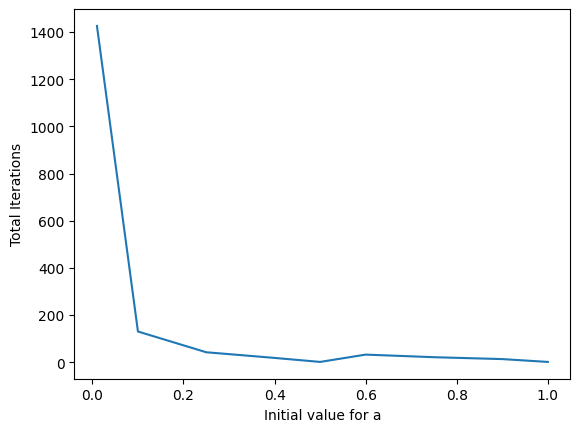

In [ ]:
#Exercise 2 part 1a Grad Descent with inexact line search, iterations vs a0

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x+49)**2 + (y-36)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x + 98

def df_dy(x, y):
    return 2*y - 72

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent inexact step length algorithm
def gradient_descent_inexact(start_x, start_y, a0, toler_level):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(toler_level)
        count = 0

        #initialise values for our a, gamma, and p
        a = a0
        gamma = 0.5
        p = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            #now a loop to conduct inexact line search
            while (f(x - a*grad_x , y - a*grad_y) > (f(x,y) - gamma*a*((grad_x*grad_x) + (grad_y)*(grad_y)))):
                a = p*a

            # Update the parameters
            x = x - a * grad_x
            y = y - a * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

        return x, y, f(x, y), count, history


#defining the start points for the backtracking algorithm
a0 = np.array([1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01])

# Perform gradient descent and plot the results
start_x, start_y = 100, 100

#setting tolerance levels
toler_level = 10

#also creating list to append values to plot iterations vs a0
A0 = []
I = []

#looping it to find everything
for i in range(len(a0)):

    a_init = a0[i]
    x_opt, y_opt, f_opt, iter, history = gradient_descent_inexact(start_x, start_y, a_init, toler_level)
    A0.append(a_init)
    I.append(iter)

    print()
    print("For the initial value of a = ", a0[i])
    print("Minimised value = ", f_opt)
    print("Minimiser in x = ", x_opt)
    print("Minimiser in y = ", y_opt)
    print("Total iterations = ", iter)

plt.plot(A0, I)
plt.xlabel('Initial value for a')
plt.ylabel('Total Iterations')
plt.show()


From above, we observed that for certain values of $a_0$, the algorithm performs very well.

This is simply because some values of $a_0$ give values for step length such that they can be calculated within one iteration (when step length = 0.5), for our quadratic function.

These two values of $a_0$ are 1 and 0.5.

Ideally, we want to use 0.5 and having exactly that leads to optimisation in one step, just like how it did for our previous algorithm.

For the other values of $a_0$ we do not immediately reach step length value 0.5 or we do not reach it at all. This is visible from our plot.


for inexact line search
For the initial value of a =  0.01
Minimised value =  2.4913093745480103e-21
Minimiser in x =  -48.999999999954134
Minimiser in y =  36.00000000001969
Total iterations =  1426

For exact line search
Minimised value =  0.0
Minimiser in x =  -49.0
Minimiser in y =  36.0
Total iterations =  1


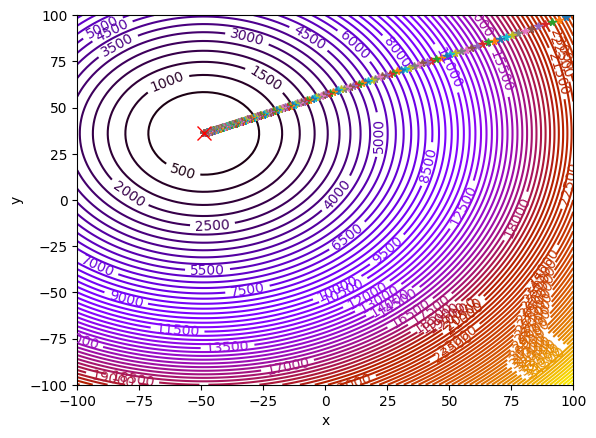

In [ ]:
#Exercise 2 Part 1b, inexact vs exact line search method, plot comparison

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x+49)**2 + (y-36)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x + 98

def df_dy(x, y):
    return 2*y - 72

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent_exact(start_x, start_y, toler_level):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(toler_level)
        count = 0

        #now regarding our function
        #it seems that the value of our step length
        #will be constant regardless of the value of x1 and x2
        #the calculated value for step length is = 0.5
        #and this appears to be the case for every general quadratic function
        #which is only dependent on one variable or in a multi-variate case
        #the gradient of each variable isn't dependent on the other

        step_length_line_search = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):

            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - step_length_line_search * grad_x
            y = y - step_length_line_search * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "rx-", ms=10)

        return x, y, f(x, y), history, count


# Define the gradient descent inexact step length algorithm
def gradient_descent_inexact(start_x, start_y, a0, toler_level):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(toler_level)
        count = 0

        #initialise values for our a, gamma, and p
        a = a0
        gamma = 0.5
        p = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            #now a loop to conduct inexact line search
            while (f(x - a*grad_x , y - a*grad_y) > (f(x,y) - gamma*a*((grad_x*grad_x) + (grad_y)*(grad_y)))):
                a = p*a

            # Update the parameters
            x = x - a * grad_x
            y = y - a * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "*", ms = 5.5)

        return x, y, f(x, y), count, history


# Plotting the level sets using a contour map
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

#initialising stop and start points
start_x, start_y = 100, 100

#define tolerance level
toler_level = 10

# Perform gradient descent (inexact)
a_init = 0.01
x_opt_inexact, y_opt_inexact, f_opt_inexact, iter_inexact, history_inexact = gradient_descent_inexact(start_x, start_y, a_init, toler_level)

print()
print("for inexact line search")
print("For the initial value of a = ", a_init)
print("Minimised value = ", f_opt_inexact)
print("Minimiser in x = ", x_opt_inexact)
print("Minimiser in y = ", y_opt_inexact)
print("Total iterations = ", iter_inexact)


# Perform gradient descent (exact line search)
x_opt_exact, y_opt_exact, f_opt_exact, history_exact, iter_exact = gradient_descent_exact(start_x, start_y, toler_level)

print()
print("For exact line search")
print("Minimised value = ", f_opt_exact)
print("Minimiser in x = ", x_opt_exact)
print("Minimiser in y = ", y_opt_exact)
print("Total iterations = ", iter_exact)





In [ ]:
#exercise 2 part 2, inexact line search for f(x)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return 256*(y - x**2)**2 + (2-x)**2


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 1024*x**3 - 1024*x*y +2*x - 4

def df_dy(x, y):
    return 512*y - 512*x**2

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent inexact step length algorithm
def gradient_descent_inexact(start_x, start_y, a0, toler_level):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(toler_level)
        count = 0

        #initialise values for our a, gamma, and p
        a = a0
        gamma = 0.5
        p = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            #now a loop to conduct inexact line search
            while (f(x - a*grad_x , y - a*grad_y) > (f(x,y) - gamma*a*((grad_x*grad_x) + (grad_y)*(grad_y)))):
                a = p*a

            # Update the parameters
            x = x - a * grad_x
            y = y - a * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

        return x, y, f(x, y), count


#defining the start points for the backtracking algorithm
a0 = np.array([1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01])

# Perform gradient descent and plot the results
start_x, start_y = 100, 100 #this is taking far too long

#setting tolerance levels
toler_level = 10

#also creating list to append values to plot iterations vs a0
A0 = []
I = []

#looping it to find everything
for i in range(len(a0)):

    a_init = a0[i]
    x_opt, y_opt, f_opt, iter= gradient_descent_inexact(start_x, start_y, a_init, toler_level)
    A0.append(a_init)
    I.append(iter)

    print()
    print("For the initial value of a = ", a0[i])
    print("Minimised value = ", f_opt)
    print("Minimiser in x = ", x_opt)
    print("Minimiser in y = ", y_opt)
    print("Total iterations = ", iter)

plt.plot(A0, I)
plt.xlabel('Initial value for a')
plt.ylabel('Total Iterations')
plt.show()

#due to poor connection and a time taking function, no iterations were able to print in the given time duration

It is clear that exact line search gives a faster convergence than inexact

However for functions like $f(x)$ they can only be optimised using inexact line search rather than exact